In [1]:
# %load ../../load_magic/storage.py

!mkdir ..\data
!mkdir ..\data\csv
!mkdir ..\saves
!mkdir ..\saves\pickle
!mkdir ..\saves\csv
import pickle
import pandas as pd
import os

# Handy list of the different types of encodings
encoding = ['latin1', 'iso8859-1', 'utf-8'][0]

# Change this to your data and saves folders
data_folder = r'../data/'
saves_folder = r'../saves/'

def load_csv(csv_name=None, folder_path=None):
    if folder_path is None:
        csv_folder = data_folder + 'csv/'
    else:
        csv_folder = folder_path + 'csv/'
    if csv_name is None:
        csv_path = max([os.path.join(csv_folder, f) for f in os.listdir(csv_folder)],
                       key=os.path.getmtime)
    else:
        csv_path = csv_folder + csv_name + '.csv'
    data_frame = pd.read_csv(csv_path, encoding=encoding)
    
    return(data_frame)

def load_dataframes(**kwargs):
    frame_dict = {}
    for frame_name in kwargs:
        pickle_path = saves_folder + 'pickle/' + frame_name + '.pickle'
        if not os.path.isfile(pickle_path):
            csv_folder = saves_folder + 'csv/'
            csv_path = csv_folder + frame_name + '.csv'
            if not os.path.isfile(csv_path):
                csv_path = data_folder + 'csv/' + frame_name + '.csv'
                if not os.path.isfile(csv_path):
                    frame_dict[frame_name] = None
                else:
                    frame_dict[frame_name] = load_csv(csv_name=frame_name)
            else:
                frame_dict[frame_name] = load_csv(csv_name=frame_name, folder_path=csv_folder)
        else:
            frame_dict[frame_name] = load_object(frame_name)
    
    return frame_dict

def load_object(obj_name, download_url=None):
    pickle_path = saves_folder + 'pickle/' + obj_name + '.pickle'
    if not os.path.isfile(pickle_path):
        csv_path = saves_folder + 'csv/' + obj_name + '.csv'
        if not os.path.isfile(csv_path):
            object = pd.read_csv(download_url, low_memory=False,
                                 encoding=encoding)
        else:
            object = pd.read_csv(csv_path, low_memory=False,
                                 encoding=encoding)
        if isinstance(object, pd.DataFrame):
            object.to_pickle(pickle_path)
        else:
            with open(pickle_path, 'wb') as handle:
                pickle.dump(object, handle, pickle.HIGHEST_PROTOCOL)
    else:
        try:
            object = pd.read_pickle(pickle_path)
        except:
            with open(pickle_path, 'rb') as handle:
                object = pickle.load(handle)
    
    return(object)

def save_dataframes(include_index=False, **kwargs):
    csv_folder = saves_folder + 'csv/'
    for frame_name in kwargs:
        if isinstance(kwargs[frame_name], pd.DataFrame):
            csv_path = csv_folder + frame_name + '.csv'
            kwargs[frame_name].to_csv(csv_path, sep=',', encoding=encoding,
                                      index=include_index)

# Classes, functions, and methods cannot be pickled
def store_objects(**kwargs):
    for obj_name in kwargs:
        if hasattr(kwargs[obj_name], '__call__'):
            raise RuntimeError('Functions cannot be pickled.')
        obj_path = saves_folder + 'pickle/' + str(obj_name)
        pickle_path = obj_path + '.pickle'
        if isinstance(kwargs[obj_name], pd.DataFrame):
            kwargs[obj_name].to_pickle(pickle_path)
        else:
            with open(pickle_path, 'wb') as handle:
                pickle.dump(kwargs[obj_name], handle, pickle.HIGHEST_PROTOCOL)

def attempt_to_pickle(df, pickle_path, raise_exception=False):
    try:
        print('Pickling to ' + pickle_path)
        df.to_pickle(pickle_path)
    except Exception as e:
        os.remove(pickle_path)
        print(e, ': Couldn\'t save ' + '{:,}'.format(df.shape[0]*df.shape[1]) + ' cells as a pickle.')
        if raise_exception:
            raise

A subdirectory or file ..\data already exists.
A subdirectory or file ..\data\csv already exists.
A subdirectory or file ..\saves already exists.
A subdirectory or file ..\saves\pickle already exists.
A subdirectory or file ..\saves\csv already exists.


<module 'platform' from 'C:\\Users\\Dave\\Anaconda3\\lib\\platform.py'>


In [2]:

skills_df = load_csv(csv_name='skill-project-dump')

In [3]:

date_fields_list = ['translation_date', 'date_added', 'date_updated']
for date_field in date_fields_list:
    skills_df[date_field] = pd.to_datetime(skills_df[date_field], unit='s')

In [4]:

skills_df.sample(4).T

,711,776,1277,1447
uuid,5447f1f8b8c917f06159651,5465356bd44228f91347141,5469767eacd932f00012512,5464247136ec35f46185986
name_en,Ballroom Dancing,Demonstration,Doubles,Plant Identification
name_fr,Danse de salon,DÌ©monstration,Double,identification des plantes
auto_translated,1,1,1,1
translation_date,2014-10-22 18:05:44,2014-11-13 22:49:16,2014-11-17 04:15:58,2014-11-13 03:24:33
date_added,2014-10-22 18:05:44,2014-11-13 22:49:15,2014-11-17 04:15:58,2014-11-13 03:24:33
date_updated,2014-10-22 18:05:44,2014-11-13 22:49:15,2014-11-17 04:15:58,2014-11-13 03:24:33
depth_level,5,5,6,6
parent_uuid,5433ffe8ec7a98f85598242,5463e8f927f5e5f78690302,5469758e312082f89243057,543ef354c13867f46958298


In [5]:

import networkx as nx

G = nx.Graph()
for row_index, row_series in skills_df.iterrows():
    
    # Any hashable Python object except None
    node = row_series['uuid']
    
    # Dictionary of node attributes
    attr_dict = row_series.to_dict()
    
    G.add_node(node, attr_dict=attr_dict)

In [6]:

for row_index, row_series in skills_df.iterrows():
    
    node = row_series['uuid']
    parent = row_series['parent_uuid']
    
    G.add_edge(node, parent)

In [7]:

import numpy as np

nx.degree(G)[np.nan]

18

C:\Users\Dave\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\Dave\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
C:\Users\Dave\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
C:\Users\Dave\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes a

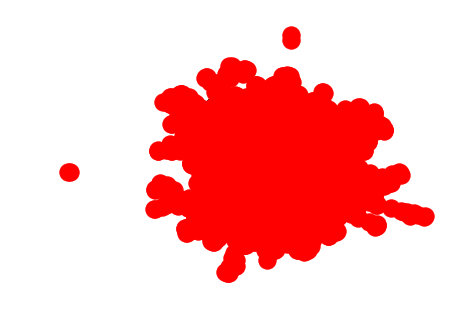

In [8]:

import matplotlib.pyplot as plt
%matplotlib inline

nx.draw(G)

C:\Users\Dave\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\Dave\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
C:\Users\Dave\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
C:\Users\Dave\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes a

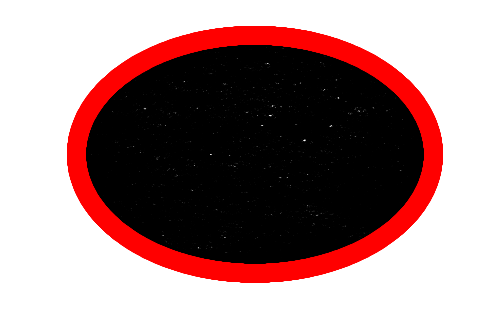

In [9]:

nx.draw_circular(G)

C:\Users\Dave\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\Dave\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
C:\Users\Dave\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
C:\Users\Dave\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes a

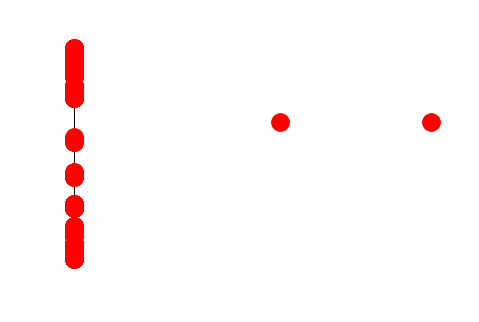

In [10]:

nx.draw_spectral(G)

In [11]:

skills_df.sort_values('depth_level', ascending=False).head(4).T

,2182,2181,2180,2179
uuid,5464b2d29bf5a1f65754060,5433f80574c1e7f22107411,5433f8273fc436f42297743,5433f7d80ad604f87992109
name_en,Wikibase,Retrieving edge values with MIN() and MAX(),Math functions like SUM() or AVG(),Couting rows with COUNT()
name_fr,WikiBase,RÌ©cupÌ©ration des valeurs extrÌ»mes,Fonctions mathÌ©matiques,Compter avec COUNT()
auto_translated,1,1,1,1
translation_date,2014-11-13 13:32:02,2014-10-07 14:26:13,2014-10-07 14:26:47,2014-10-07 14:25:28
date_added,2014-11-13 13:32:02,2014-10-07 14:26:13,2014-10-07 14:26:47,2014-10-07 14:25:28
date_updated,2014-11-13 13:32:02,2014-10-07 14:26:13,2014-10-07 14:26:47,2014-10-07 14:27:15
depth_level,11,11,11,11
parent_uuid,5464b2c76692f9f09159314,5433f7c811b490f06489959,5433f7c811b490f06489959,5433f7c811b490f06489959


C:\Users\Dave\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
C:\Users\Dave\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:


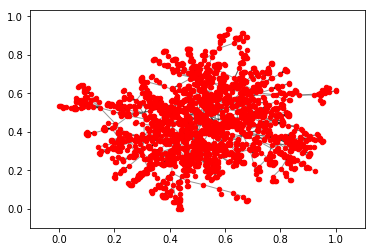

In [12]:

Gcc = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)[0]
pos = nx.spring_layout(Gcc)
nx.draw_networkx_nodes(Gcc, pos, node_size=20)
nx.draw_networkx_edges(Gcc, pos, alpha=0.4)

(0.0, 1.0, 0.0, 1.0)

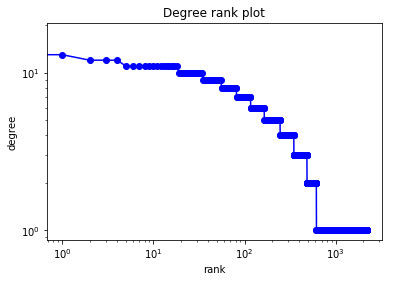

In [13]:

degree_sequence = sorted([d for n, d in G.degree().items()], reverse=True)
plt.loglog(degree_sequence,'b-',marker='o')
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")
plt.axes([0.45,0.45,0.45,0.45])
plt.axis('off')

C:\Users\Dave\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\Dave\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
C:\Users\Dave\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
C:\Users\Dave\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
C:\Users\Dave\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.

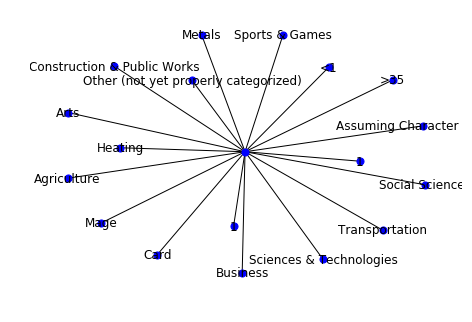

In [14]:

from operator import itemgetter

node_and_degree = dict(G.degree())
largest_hub, degree = sorted(node_and_degree.items(), key=itemgetter(1))[-1]
hub_ego = nx.ego_graph(G, largest_hub)
pos = nx.spring_layout(hub_ego)
#nx.draw(hub_ego, pos, node_color='b', node_size=50, with_labels=False)
#nx.draw_networkx_nodes(hub_ego, pos, nodelist=[largest_hub], node_size=300, node_color='r')

labels = nx.get_node_attributes(hub_ego, 'name_en')
nx.draw(hub_ego, pos, labels=labels, node_color='b', node_size=50)

In [ ]:

%%javascript
var kernel = IPython.notebook.kernel,  
    body = document.body,  
    attribs = body.attributes,  
    command = "notebook_path = " + "'"+attribs['data-notebook-path'].value+"'";
kernel.execute(command);

In [ ]:
%load ../../load_magic/nbviewer.py